***📍PHASE 3: Exploratory Data Analysis (EDA)***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/Twinkle Parmar/Untitled Folder/Electric_vehicale_updated.csv")
df.head(3)

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...


**Top 10 brands with most models**

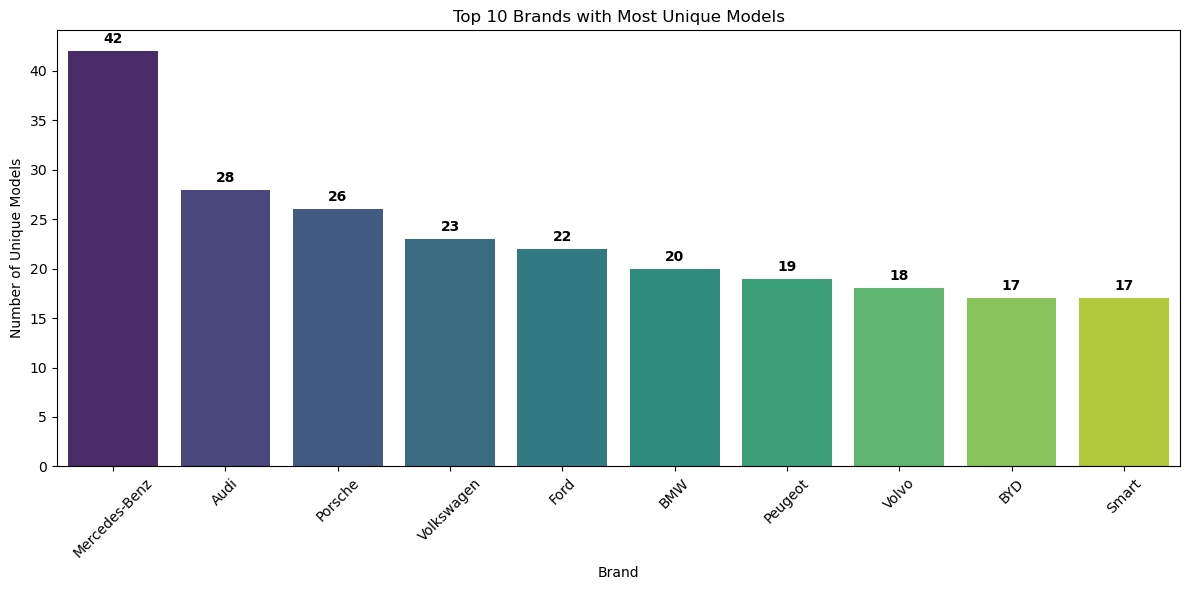

In [3]:
#Count the unique brands model
# nunique() = gives the count of unique values → works perfectly.

brand_model_unique = df.groupby('brand')['model'].nunique().sort_values(ascending=False) 
#print(brand_model_unique)
top_brands = brand_model_unique.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_brands.index, y=top_brands.values,hue=top_brands.index, palette='viridis',legend=False)

#Add Data labels

for i, v in enumerate(top_brands.values):
    plt.text(
        i,                # X position: bar index
        v + 0.5,          # Y position: just above bar
        str(v),           # Label text
        ha='center',      # horizontal alignment
        va='bottom',      # vertical alignment
        fontweight='bold'
    )
plt.title('Top 10 Brands with Most Unique Models')
plt.xlabel('Brand')
plt.ylabel('Number of Unique Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Distribution of battery capacity**

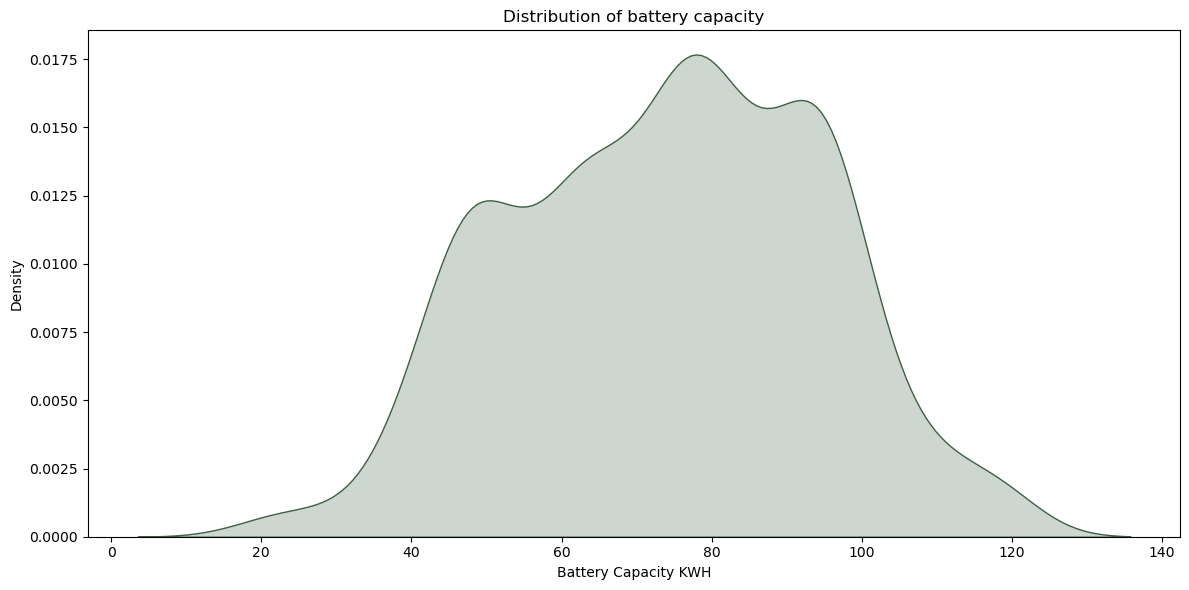

In [4]:
plt.figure(figsize=(12,6))
sns.kdeplot(df['battery_capacity_kWh'],fill=True, color='#3E5F44')
plt.title('Distribution of battery capacity')
plt.xlabel('Battery Capacity KWH')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


**Range vs Battery size**

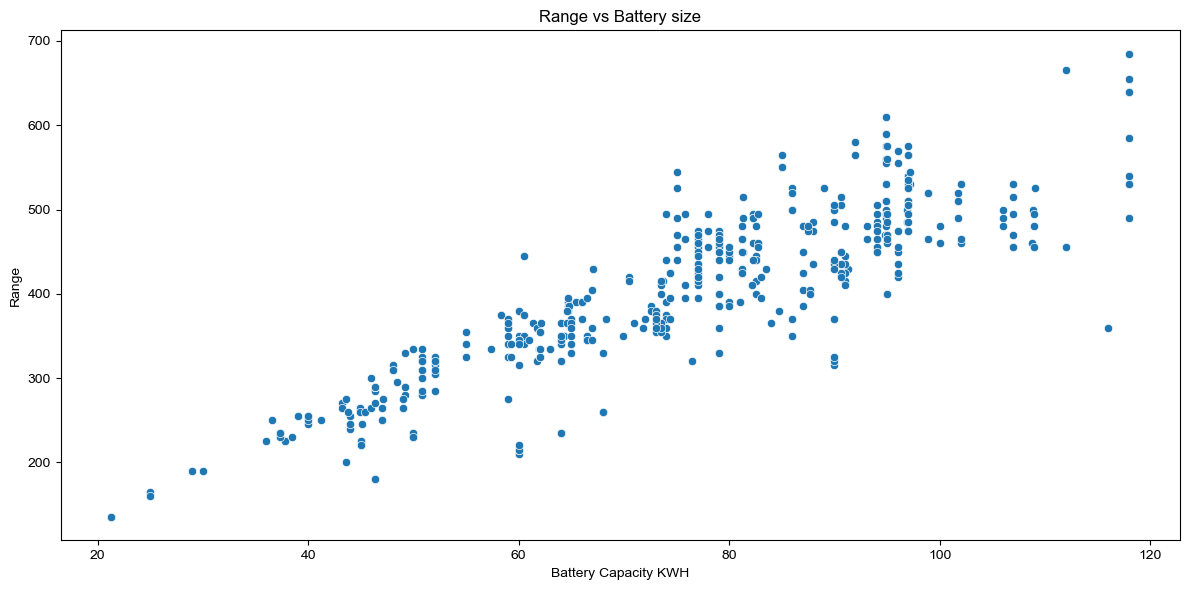

In [5]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df , x='battery_capacity_kWh',y='range_km')
sns.set_style('whitegrid')
plt.title('Range vs Battery size')
plt.xlabel('Battery Capacity KWH')
plt.ylabel('Range')
plt.tight_layout()
plt.show()

**Fast charging power vs range**

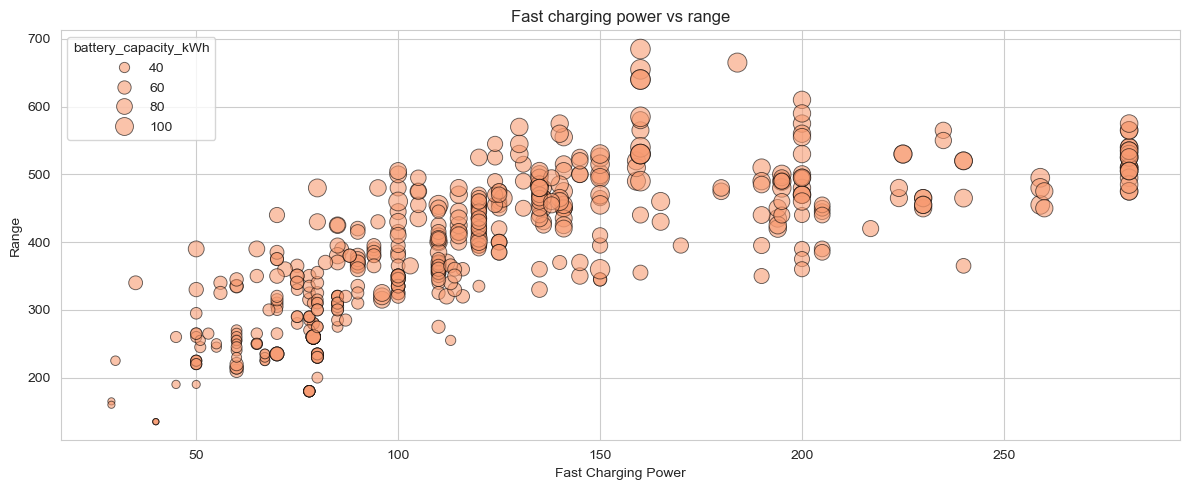

In [6]:
plt.figure(figsize=(12,5))
#sns.scatterplot(data=df,x='fast_charging_power_kw_dc',y='range_km')
sns.scatterplot(
    data=df,
    x='fast_charging_power_kw_dc',
    y='range_km',
    size='battery_capacity_kWh',   # size of bubble
    sizes=(20, 200),               # min & max bubble size
    alpha=0.6,                     # make bubbles semi-transparent
    edgecolor='black' ,color='#F79B72'
)
plt.title('Fast charging power vs range')
plt.xlabel('Fast Charging Power')
plt.ylabel('Range')
plt.tight_layout()
plt.show()


**Most efficient models**

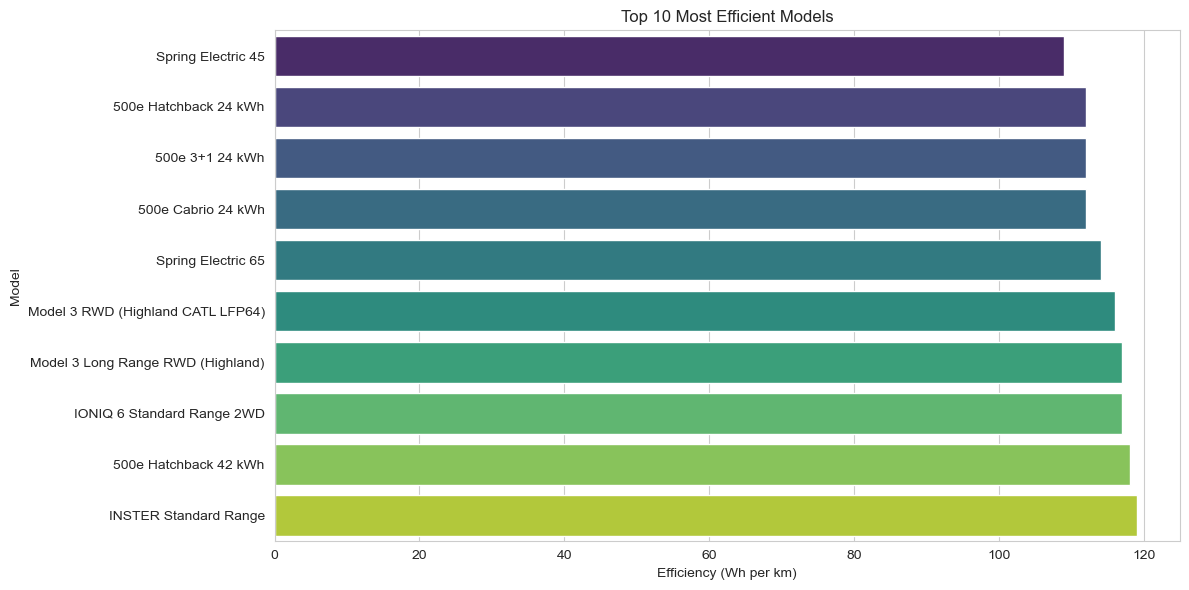

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by efficiency
df_sorted = df.sort_values('efficiency_wh_per_km')

# Take top 10 most efficient models
top_efficient = df_sorted.head(10)

plt.figure(figsize=(12, 6))

sns.barplot(
    data=top_efficient,
    y='model',
    x='efficiency_wh_per_km',
    palette='viridis',hue='model' , legend=False   # _r reverses the palette so low values are darker
)

plt.title('Top 10 Most Efficient Models')
plt.xlabel('Efficiency (Wh per km)')
plt.ylabel('Model')
plt.tight_layout()
plt.show()


**Torque vs Acceleration**

Matrix                       torque_nm  acceleration_0_100_s
torque_nm              1.000000             -0.773713
acceleration_0_100_s  -0.773713              1.000000



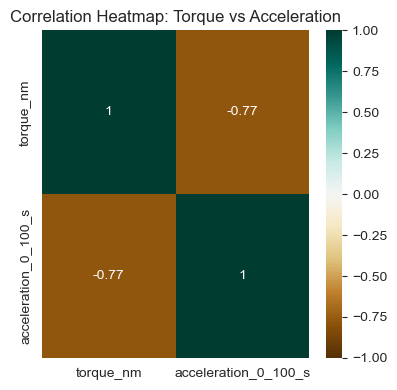

In [8]:
corr_df = df[['torque_nm','acceleration_0_100_s']]
corr_matrix = corr_df.corr()
print('Matrix',corr_matrix)
print()

plt.figure(figsize=(4,4))
sns.heatmap(corr_matrix,
    annot=True,      # show correlation numbers
    cmap='BrBG', # color palette
    vmin=-1, vmax=1)  # keep scale consistent
plt.title("Correlation Heatmap: Torque vs Acceleration")
plt.tight_layout()
plt.show()

**EV segment analysis using pie chart**

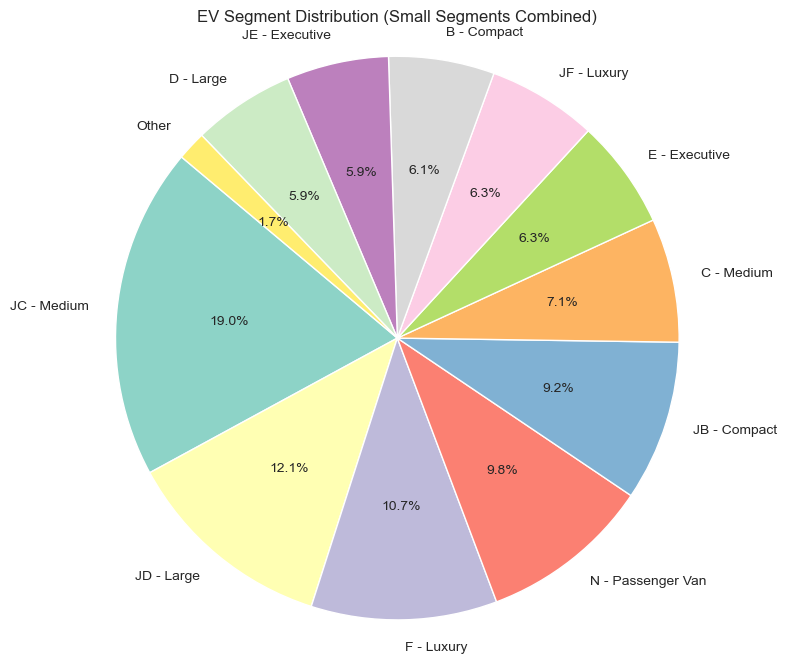

In [9]:
segment_counts = df['segment'].value_counts().reset_index()
segment_counts.columns = ['segment', 'count']
segment_counts = segment_counts.sort_values('count', ascending=False)
# Define threshold
threshold = 10

# Split into big segments and small segments
big_segments = segment_counts[segment_counts['count'] > threshold]
small_segments = segment_counts[segment_counts['count'] <= threshold]
# Create "Other" row
other = pd.DataFrame({
    'segment': ['Other'],
    'count': [small_segments['count'].sum()]
})
# Combine
segment_counts_combined = pd.concat([big_segments, other])
#print(segment_counts_combined)
print()
print()



plt.figure(figsize=(8, 8))
plt.pie(
    segment_counts_combined['count'],
    labels=segment_counts_combined['segment'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors  # optional nice colors
)
plt.title('EV Segment Distribution (Small Segments Combined)')
plt.axis('equal')
plt.show()


**EV segment analysis using bar chart**

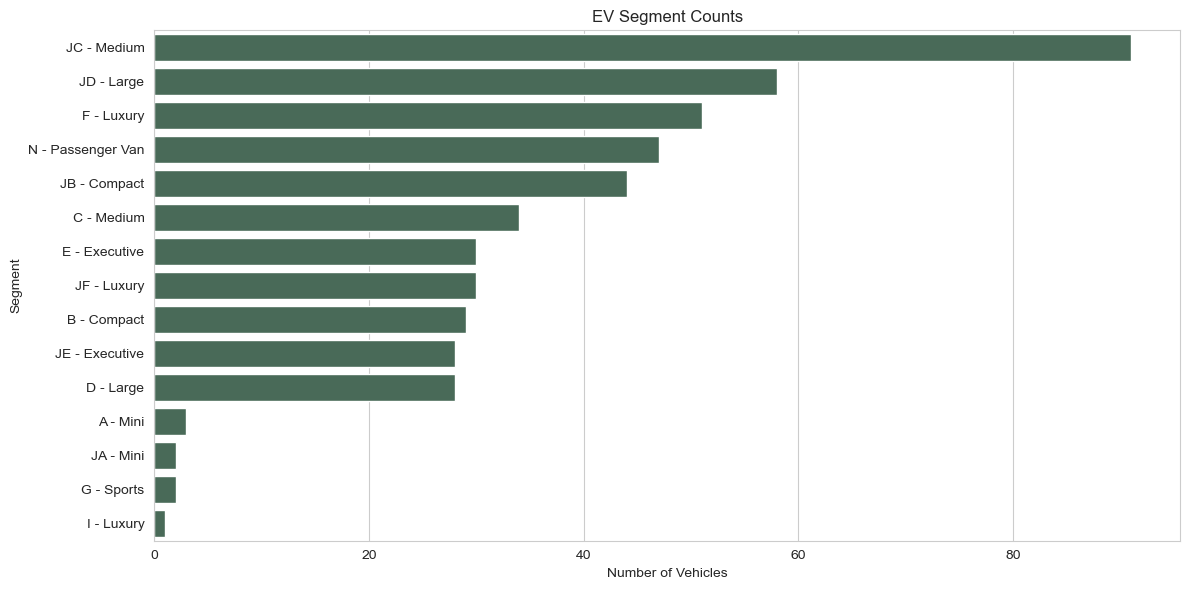

In [10]:
segment_counts = df['segment'].value_counts().reset_index()
segment_counts.columns = ['segment', 'count']
#print(segment_counts)
segment_counts = segment_counts.sort_values('count', ascending=False)


plt.figure(figsize=(12, 6))

sns.barplot( data=segment_counts,y='segment',x='count',color='#437057')

plt.title('EV Segment Counts')
plt.xlabel('Number of Vehicles')
plt.ylabel('Segment')
plt.tight_layout()
plt.show()




**Body type distribution**

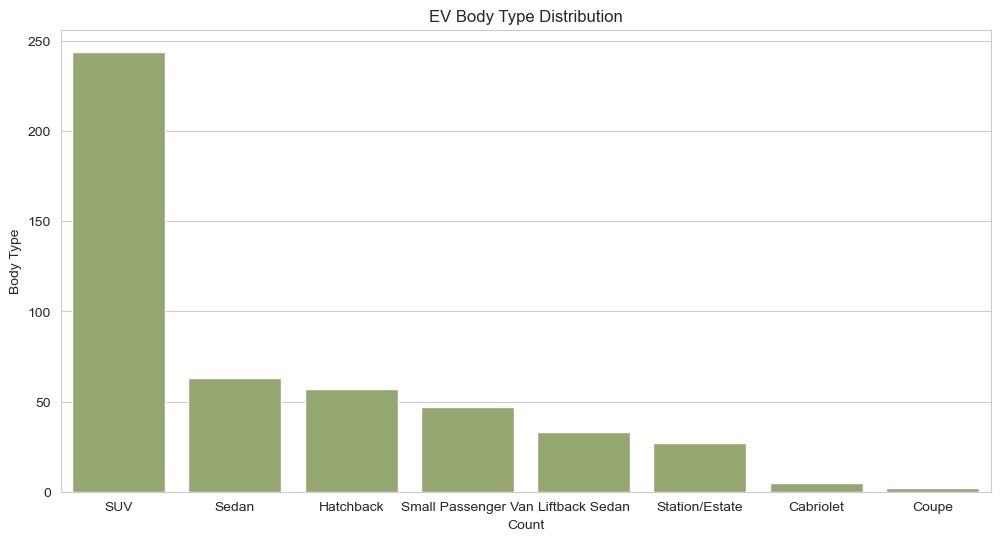

In [11]:
count = df['car_body_type'].value_counts().index
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='car_body_type',color='#97B067', order=count)
plt.title('EV Body Type Distribution')
plt.xlabel('Count')
plt.ylabel('Body Type')
plt.show()

***📍PHASE 4: Feature Engineering & Advanced Insights***

In [12]:
# Create the new column directly on df
df['range_per_kWh'] = df['range_km'] / df['battery_capacity_kWh']
def classify_range(range_km):
    if range_km < 300:
        return 'Short'
    elif 300 <= range_km <= 500:
        return 'Mid'
    else:
        return 'Long'
df['range_category'] = df['range_km'].apply(classify_range)
top_efficiency = df.sort_values(by='efficiency_wh_per_km').head(10)
#df.head()
print("Top 10 Most Efficient EVs (Lowest Wh/km):")
print(top_efficiency)


# Save to Excel

Top 10 Most Efficient EVs (Lowest Wh/km):
       brand                              model  top_speed_kmh  \
98     Dacia                 Spring Electric 45            125   
107     Fiat              500e Hatchback 24 kWh            135   
103     Fiat                    500e 3+1 24 kWh            135   
105     Fiat                 500e Cabrio 24 kWh            135   
99     Dacia                 Spring Electric 65            125   
400    Tesla  Model 3 RWD (Highland CATL LFP64)            201   
398    Tesla  Model 3 Long Range RWD (Highland)            201   
156  Hyundai         IONIQ 6 Standard Range 2WD            185   
108     Fiat              500e Hatchback 42 kWh            150   
149  Hyundai              INSTER Standard Range            140   

     battery_capacity_kWh battery_type  number_of_cells  torque_nm  \
98                   25.0  Lithium-ion             72.0      125.0   
107                  21.3  Lithium-ion            108.0      220.0   
103                  

In [13]:
df.to_csv("C:/Users/Twinkle Parmar/Untitled Folder/Data with feature.csv")
print("File is Created")

File is Created


**📍PHASE 5:Predictive Modeling**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
#Feature 
x = df[['battery_capacity_kWh', 'efficiency_wh_per_km', 'torque_nm']]
y = df['range_km']

In [16]:
#Train_Test_Split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
print(x_train.shape)   # e.g. (382, 3)
print(y_train.shape)   # e.g. (382,)

lr = LinearRegression()
lr.fit(x_train, y_train)


(382, 3)
(382,)


LinearRegression()

In [18]:
y_pred = lr.predict(x_test)

In [19]:
# Show first 10 predicted vs actual
results = pd.DataFrame()
results['Actual_Range'] = y_test.values
results['Predicted_Range'] = y_pred
print(results.head(10))


   Actual_Range  Predicted_Range
0           480       501.666639
1           495       501.612943
2           235       107.738062
3           415       426.973120
4           445       431.939151
5           320       277.570654
6           400       384.298042
7           365       355.235700
8           290       294.735208
9           305       298.863711


In [20]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)*100
print(r2)

86.96680098256553


In [21]:
new_data = pd.DataFrame({
    'battery_capacity_kWh': [75],
    'efficiency_wh_per_km': [160],
    'torque_nm': [400]
})

# Predict
predicted_range = lr.predict(new_data)
print(f"Predicted Range: {predicted_range[0]:.2f} km")

Predicted Range: 400.58 km


In [22]:
ev_input = pd.DataFrame([[77, 169, 545]], columns=['battery_capacity_kWh', 'efficiency_wh_per_km', 'torque_nm'])

# Predict using the same structure
predicted_range = lr.predict(ev_input)[0]

print("🔋 Predicted Range (km):", round(predicted_range, 2))

🔋 Predicted Range (km): 401.6


In [23]:
# Assuming your trained model is named `model`
import joblib  
joblib.dump(lr, 'ev_range_predictor.pkl')

['ev_range_predictor.pkl']